In [1]:
import pandas as pd
from tabulate import tabulate

In [2]:
DATA_PATH = "data.csv"
df = pd.read_csv(DATA_PATH)

# Frequency as a function of time ($\frac{cycles}{minute}$)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

,distance,split-time
0,15,6.90
1,25,13.84
2,35,20.68
3,50,30.03
4,65,39.80
5,75,46.61
6,85,54.02
7,100,65.07


X: 1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
Name: distance, dtype: int64


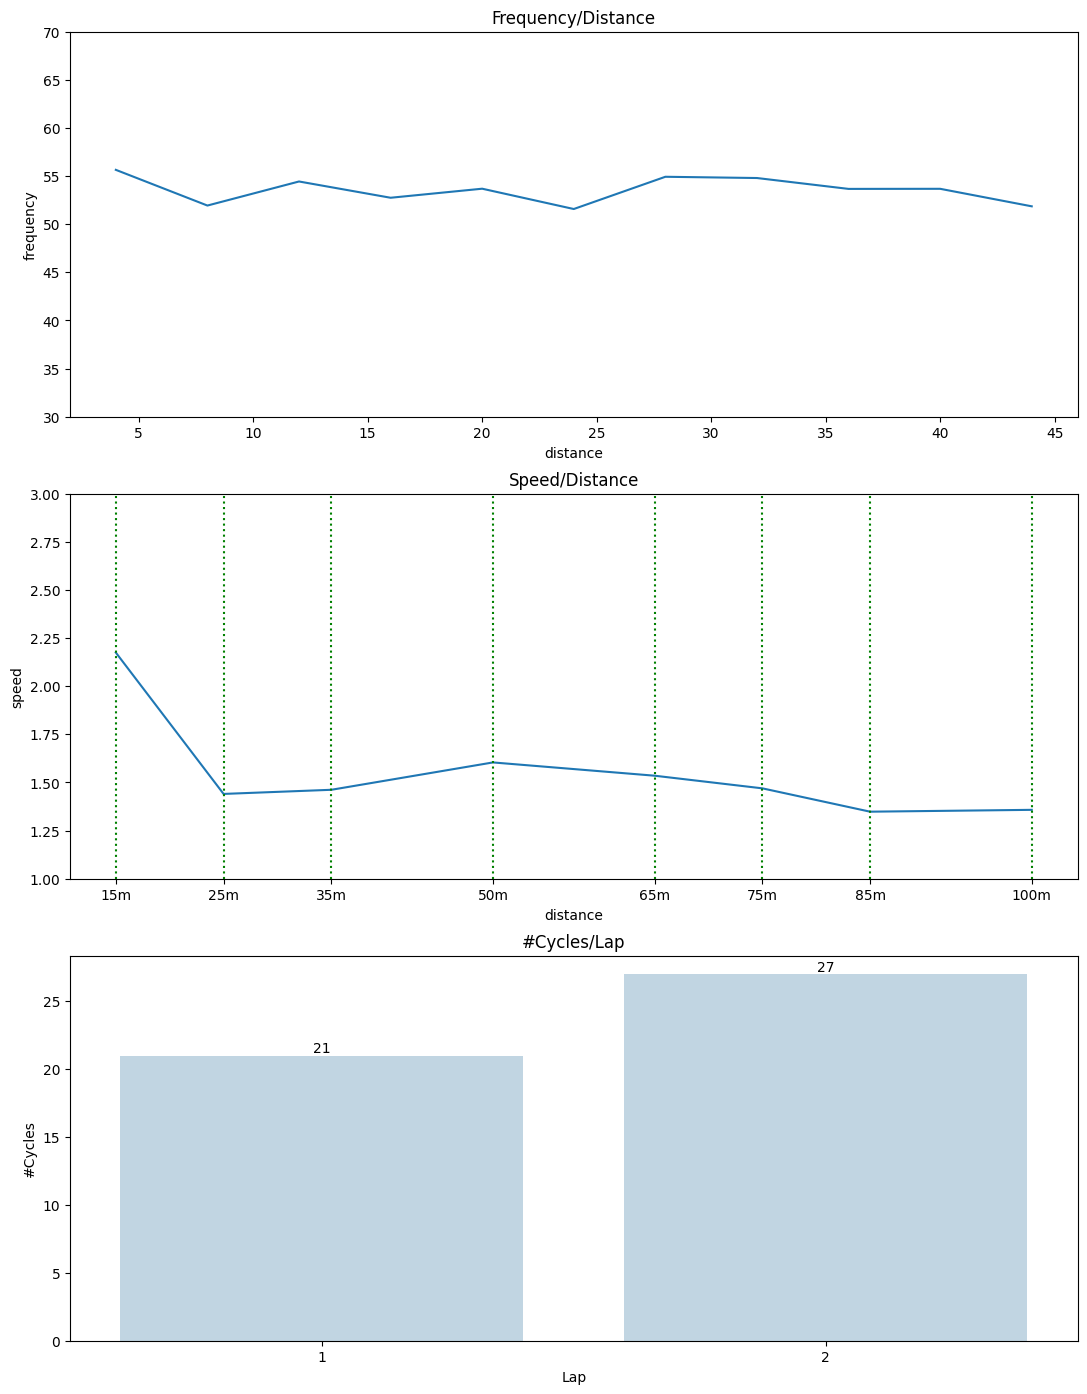

In [4]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
from utils import race_report as RR
from utils import plotting

# 25 for SCM, 50 for LCM.
LAP_LEN = 25

fig, ax = plt.subplots(nrows=3, figsize=(13, 17))

# Distance ticks/labels
lap_indices = RR.get_bo_indices(df)
distances = [RR.format_distance((i + 1)*LAP_LEN) for i in range(len(lap_indices))]

# Frequency Dataframe.
df_frequency = df[[RR.COL_MES, RR.COL_TIME]][df[RR.COL_MES] == RR.VAL_CYCLE]
df_frequency.loc[:, RR.COL_Y] = (60 / df[RR.COL_TIME]).rolling(window=4, step=4).mean()


# Speed Dataframe.
df_speed = RR.calc_speed(df, lap_indices)

# Splits.
display(df_speed[["distance", "split-time"]].round(decimals=2).astype({"distance": int}))

# DPS.
(stats, df_frequency) = RR.calc_frequency(df_frequency)
# display(df_frequency.drop(["interval-time", RR.COL_X, RR.COL_MES], axis=1))
table = tabulate(pd.DataFrame({"std": [stats.std], "mean": [stats.mean]})
                 , tablefmt='text'
                 ,headers=["std", "mean"])
# Plotting.

#
# Distances
#
plotting.plot_frequency(df_frequency, ax=ax[0])

#
# Speed
#
plotting.plot_speed(df_speed, ax=ax[1])

#
# DPS
#
plotting.plot_dps(df, ax=ax[2])
plt.show()